In [2]:
# imports

import os
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model


In [3]:
# Define the data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='nearest'
)


# Set the paths to the image directories
train_dir = 'C:/Users/imran/OneDrive/Desktop/2 Sem/KSTC Project/Data/train'
test_dir = 'C:/Users/imran/OneDrive/Desktop/2 Sem/KSTC Project/Data/test'

augmented_dir = 'C:\\Users\\imran\\OneDrive\\Desktop\\2 Sem\\KSTC Project\\Augmented Images'


# Load and augment images from the train/non-toxic directory
# train_non_toxic_dir = os.path.join(train_dir, 'non-toxic')
train_non_toxic_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=1,
    class_mode=None,
    save_to_dir=os.path.join(augmented_dir, 'train'),
    save_prefix='augmented',
    save_format='jpg'
)

# Generate and save augmented images from the train/non-toxic directory
num_augmented_images = 550
for _ in range(num_augmented_images):
    batch = train_non_toxic_generator.next()

    
# Load and augment images from the test/toxic directory
test_toxic_dir = os.path.join(test_dir, 'toxic')
test_toxic_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=1,
    class_mode=None,
    save_to_dir=os.path.join(augmented_dir, 'test'),
    save_prefix='augmented',
    save_format='jpg'
)

test_num_augmented_images = 150
# Generate and save augmented images from the test/toxic directory
for _ in range(test_num_augmented_images):
    batch = test_toxic_generator.next()


Found 206 images belonging to 2 classes.
Found 52 images belonging to 2 classes.


# RESENET-50

In [3]:


# Set the paths to the train and test directories
train_folder = 'C:/Users/imran/OneDrive/Desktop/2 Sem/KSTC Project/Augmented Images/train'
test_folder = 'C:/Users/imran/OneDrive/Desktop/2 Sem/KSTC Project/Augmented Images/test'


# Set the input image dimensions and the number of classes
image_size = (227, 227)
num_classes = 2  # Assuming two classes: toxic and nontoxic

# Create an ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Generate batches of augmented/normalized data from the train and test directories
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Load the pre-trained ResNet-50 model without the top (fully connected) layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom top layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the pre-trained layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_folder, epochs=10)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_folder)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

Found 550 images belonging to 2 classes.
Found 150 images belonging to 2 classes.


IndexError: tuple index out of range

In [5]:


# Set the paths to the train and test directories
train_folder = 'C:/Users/imran/OneDrive/Desktop/2 Sem/KSTC Project/Augmented Images/train'
test_folder = 'C:/Users/imran/OneDrive/Desktop/2 Sem/KSTC Project/Augmented Images/test'


# Set the input image dimensions and the number of classes
image_size = (224, 224)
num_classes = 2  # Assuming two classes: toxic and nontoxic

train_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Generate batches of normalized data from the train and test directories
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Load the pre-trained ResNet-50 model without the top (fully connected) layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom top layers for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the pre-trained layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=10)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_generator)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

Found 550 images belonging to 2 classes.
Found 150 images belonging to 2 classes.
Epoch 1/10
18/18 [==============================] - 38s 2s/step - loss: 0.7024 - accuracy: 0.7473
Epoch 2/10
18/18 [==============================] - 31s 2s/step - loss: 0.5072 - accuracy: 0.7927
Epoch 3/10
18/18 [==============================] - 26s 1s/step - loss: 0.4541 - accuracy: 0.8091
Epoch 4/10
18/18 [==============================] - 27s 1s/step - loss: 0.4187 - accuracy: 0.8164
Epoch 5/10
18/18 [==============================] - 29s 2s/step - loss: 0.4063 - accuracy: 0.8236
Epoch 6/10
18/18 [==============================] - 28s 2s/step - loss: 0.4147 - accuracy: 0.8127
Epoch 7/10
18/18 [==============================] - 26s 1s/step - loss: 0.3747 - accuracy: 0.8327
Epoch 8/10
18/18 [==============================] - 28s 2s/step - loss: 0.3649 - accuracy: 0.8382
Epoch 9/10
18/18 [==============================] - 29s 2s/step - loss: 0.3573 - accuracy: 0.8309
Epoch 10/10
5/5 [===================

In [6]:
# Generate predictions for the test data
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)  # Convert predicted probabilities to class labels

# Get the true labels from the test data generator
y_true = test_generator.classes

# Get the class labels
class_labels = list(test_generator.class_indices.keys())

# Generate the classification report
report = classification_report(y_true, y_pred, target_names=class_labels, zero_division=1)

print(report)


5/5 [==============================] - 10s 2s/step
              precision    recall  f1-score   support

   non-toxic       0.84      0.93      0.88       119
       toxic       0.56      0.32      0.41        31

    accuracy                           0.81       150
   macro avg       0.70      0.63      0.65       150
weighted avg       0.78      0.81      0.79       150



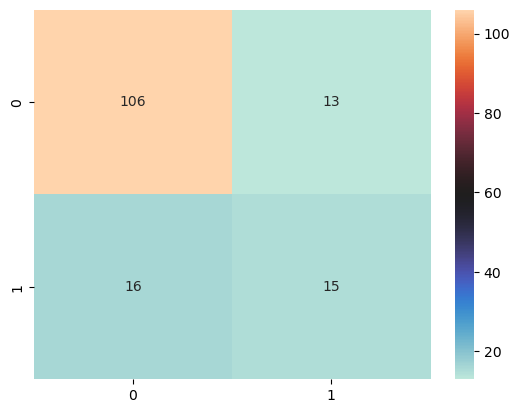

In [38]:
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d", cmap='icefire');

# ALEXNET

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

# Set the paths to the train and test directories
train_folder = 'C:/Users/imran/OneDrive/Desktop/2 Sem/KSTC Project/Augmented Images/train'
test_folder = 'C:/Users/imran/OneDrive/Desktop/2 Sem/KSTC Project/Augmented Images/test'

# Set the input image dimensions and the number of classes
image_size = (224, 224)
num_classes = 2  # Assuming two classes: toxic and nontoxic

# # Create an ImageDataGenerator for data augmentation and normalization
# train_datagen = ImageDataGenerator(
#     rescale=1.0 / 255,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True
# )

# test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)


# Generate batches of augmented/normalized data from the train and test directories
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Create the AlexNet model
model = Sequential([
    Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((3, 3), strides=(2, 2)),
    Conv2D(256, (5, 5), activation='relu'),
    MaxPooling2D((3, 3), strides=(2, 2)),
    Conv2D(384, (3, 3), activation='relu'),
    Conv2D(384, (3, 3), activation='relu'),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((3, 3), strides=(2, 2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=10)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_generator)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')


Found 550 images belonging to 2 classes.
Found 150 images belonging to 2 classes.
Epoch 1/10
18/18 [==============================] - 12s 632ms/step - loss: 0.5802 - accuracy: 0.7818
Epoch 2/10
18/18 [==============================] - 11s 614ms/step - loss: 0.5250 - accuracy: 0.7909
Epoch 3/10
18/18 [==============================] - 11s 623ms/step - loss: 0.5109 - accuracy: 0.7909
Epoch 4/10
18/18 [==============================] - 11s 585ms/step - loss: 0.5149 - accuracy: 0.7909
Epoch 5/10
18/18 [==============================] - 11s 580ms/step - loss: 0.5151 - accuracy: 0.7909
Epoch 6/10
18/18 [==============================] - 12s 657ms/step - loss: 0.5149 - accuracy: 0.7909
Epoch 7/10
18/18 [==============================] - 10s 571ms/step - loss: 0.5140 - accuracy: 0.7909
Epoch 8/10
18/18 [==============================] - 10s 556ms/step - loss: 0.5120 - accuracy: 0.7909
Epoch 9/10
18/18 [==============================] - 10s 558ms/step - loss: 0.5055 - accuracy: 0.7909
Epoch 10/

5/5 [==============================] - 1s 176ms/step
              precision    recall  f1-score   support

   non-toxic       0.79      1.00      0.88       119
       toxic       1.00      0.00      0.00        31

    accuracy                           0.79       150
   macro avg       0.90      0.50      0.44       150
weighted avg       0.84      0.79      0.70       150



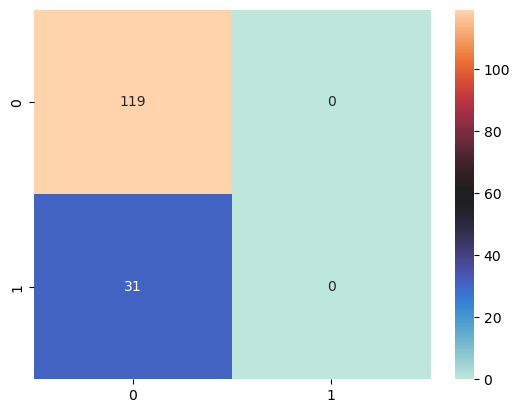

In [7]:
# Generate predictions for the test data
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)  # Convert predicted probabilities to class labels

# Get the true labels from the test data generator
y_true = test_generator.classes

# Get the class labels
class_labels = list(test_generator.class_indices.keys())

# Generate the classification report
report = classification_report(y_true, y_pred, target_names=class_labels, zero_division=1)

print(report)

sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d", cmap='icefire');

Found 550 images belonging to 2 classes.
Found 150 images belonging to 2 classes.
Epoch 1/10
18/18 [==============================] - 14s 754ms/step - loss: 0.5858 - accuracy: 0.7927
Epoch 2/10
18/18 [==============================] - 14s 752ms/step - loss: 0.5103 - accuracy: 0.7909
Epoch 3/10
18/18 [==============================] - 16s 877ms/step - loss: 0.5203 - accuracy: 0.7909
Epoch 4/10
18/18 [==============================] - 15s 782ms/step - loss: 0.5269 - accuracy: 0.7909
Epoch 5/10
18/18 [==============================] - 14s 773ms/step - loss: 0.5179 - accuracy: 0.7909
Epoch 6/10
18/18 [==============================] - 12s 650ms/step - loss: 0.5142 - accuracy: 0.7909
Epoch 7/10
18/18 [==============================] - 12s 667ms/step - loss: 0.5139 - accuracy: 0.7909
Epoch 8/10
18/18 [==============================] - 12s 675ms/step - loss: 0.5108 - accuracy: 0.7909
Epoch 9/10
18/18 [==============================] - 16s 913ms/step - loss: 0.5102 - accuracy: 0.7909
Epoch 10/

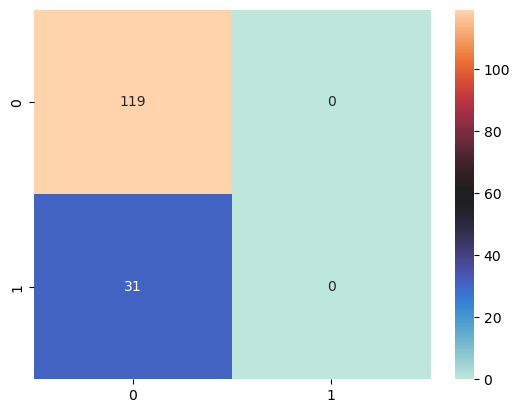

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

# Set the paths to the train and test directories
train_folder = 'C:/Users/imran/OneDrive/Desktop/2 Sem/KSTC Project/Augmented Images/train'
test_folder = 'C:/Users/imran/OneDrive/Desktop/2 Sem/KSTC Project/Augmented Images/test'

# Set the input image dimensions and the number of classes
image_size = (224, 224)
num_classes = 2  # Assuming two classes: toxic and nontoxic

# # Create an ImageDataGenerator for data augmentation and normalization
# train_datagen = ImageDataGenerator(
#     rescale=1.0 / 255,
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True
# )

# test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)


# Generate batches of augmented/normalized data from the train and test directories
train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_folder,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Create the AlexNet model
model = Sequential([
    Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((3, 3), strides=(2, 2)),
    Conv2D(300, (5, 5), activation='relu'),
    MaxPooling2D((3, 3), strides=(2, 2)),
    Conv2D(395, (3, 3), activation='relu'),
    Conv2D(395, (3, 3), activation='relu'),
    Conv2D(260, (3, 3), activation='relu'),
    MaxPooling2D((3, 3), strides=(2, 2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=10)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_generator)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')


# Generate predictions for the test data
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions, axis=1)  # Convert predicted probabilities to class labels

# Get the true labels from the test data generator
y_true = test_generator.classes

# Get the class labels
class_labels = list(test_generator.class_indices.keys())

# Generate the classification report
report = classification_report(y_true, y_pred, target_names=class_labels, zero_division=1)

print(report)

sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d", cmap='icefire');


## Converting image to arrays

In [4]:
import os
import cv2
import numpy as np

# Set the path to the root directory containing the images
# data_dir = './Data/train'
data_dir = 'C:/Users/imran/OneDrive/Desktop/2 Sem/KSTC Project/Datasets'
# Get the subdirectory names (class labels)
class_labels = sorted(os.listdir(data_dir))

# Initialize empty lists for storing images and labels
images = []
labels = []

# image_size = (224, 224) 

# Iterate over the subdirectories (class labels)
for label_idx, label in enumerate(class_labels):
    label_dir = os.path.join(data_dir, label)
    
    # Iterate over the image files in each subdirectory
    for image_file in os.listdir(label_dir):
        image_path = os.path.join(label_dir, image_file)
        
        # Read the image and convert it to grayscale
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        
#         resized_image = cv2.resize(image, image_size)
        image = image.flatten()
        
        normalised_images = image / 255
        
        # Append the image and label to the respective lists
        images.append(normalised_images)
        labels.append(label_idx)  # Assign label index as the label

# Convert the lists to NumPy arrays
# images = np.arrayimages)
labels = np.array(labels)

# Print the shapes of the images and labels arrays
print('Images shape:', len(images))
print('Labels shape:', labels.shape)

Images shape: 700
Labels shape: (700,)


# SVM


Classification report for SVM Model: 

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       113
           1       0.71      0.19      0.29        27

    accuracy                           0.83       140
   macro avg       0.77      0.58      0.60       140
weighted avg       0.81      0.83      0.79       140



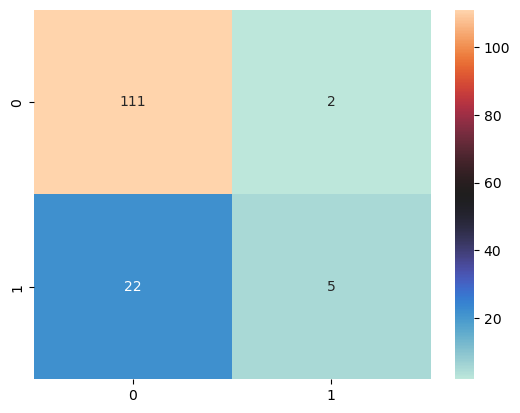

In [10]:
# Assuming you have extracted features from the mushroom images and stored them in X
# X should be a 2D array where each row represents the feature vector of a mushroom image
# Assuming you have corresponding labels indicating toxicity in y as a 1D array

X = pd.DataFrame(images)
y = labels

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier
clf = svm.SVC()

# Train the SVM classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred,zero_division=1)
print('')
print('Classification report for SVM Model: ')
print('')
print(report)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap='icefire');


Classification report for SVM Model: 

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       122
           1       0.86      0.21      0.33        29

    accuracy                           0.84       151
   macro avg       0.85      0.60      0.62       151
weighted avg       0.84      0.84      0.80       151



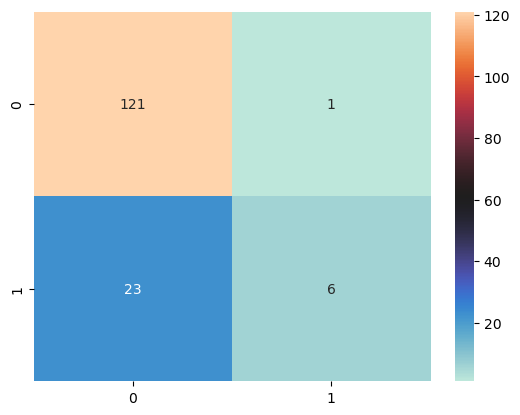

In [7]:
# Assuming you have extracted features from the mushroom images and stored them in X
# X should be a 2D array where each row represents the feature vector of a mushroom image
# Assuming you have corresponding labels indicating toxicity in y as a 1D array

X = pd.DataFrame(images)
y = labels

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.215, random_state=42)

# Create an SVM classifier
clf = svm.SVC()

# Train the SVM classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred,zero_division=1)
print('')
print('Classification report for SVM Model: ')
print('')
print(report)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap='icefire');

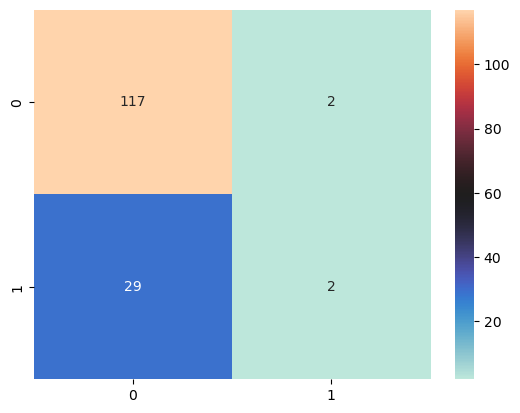

In [15]:
# sns.heatmap([[117,2 ],
#  [29,2]], annot= True, fm)

sns.heatmap([[117,2 ],
 [29,2]], annot=True, fmt="d", cmap='icefire');